In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

CONFIGURE THE BIGQUERY SETTINGS

In [3]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [4]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_training.weather_data`
"""

In [5]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data['date']= pd.to_datetime(data['date'])
data.head()

,date,max_rel_humidity,max_temperature,mean_temperature,min_rel_humidity,min_temperature,potential_water_deficit,precipitation_data,wind_speed
0,2019-09-04,99.9498,25.4570,18.6242,56.4720,11.7913,-3.6142,0.0,3.6461
1,2020-02-16,84.4966,8.6228,3.1896,40.7666,-2.2436,-1.4307,0.0,2.2398
2,2019-12-19,95.9017,2.8886,-3.4884,39.0330,-9.8654,-0.9389,0.0,4.1230
3,2020-02-20,70.0359,0.7939,-4.0254,34.7544,-8.8446,-1.4427,0.0,4.8531
4,2019-12-23,97.1634,13.8411,5.7818,31.2553,-2.2774,-1.2787,0.0,2.3404


In [6]:
X = data.drop("wind_speed",1)   #Feature Matrix
X = data.drop("date",1)
y = data["wind_speed"]          #Target Variable

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_13416/3613689375.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop("wind_speed",1)   #Feature Matrix
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_13416/3613689375.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop("date",1)


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_13416/3188068582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


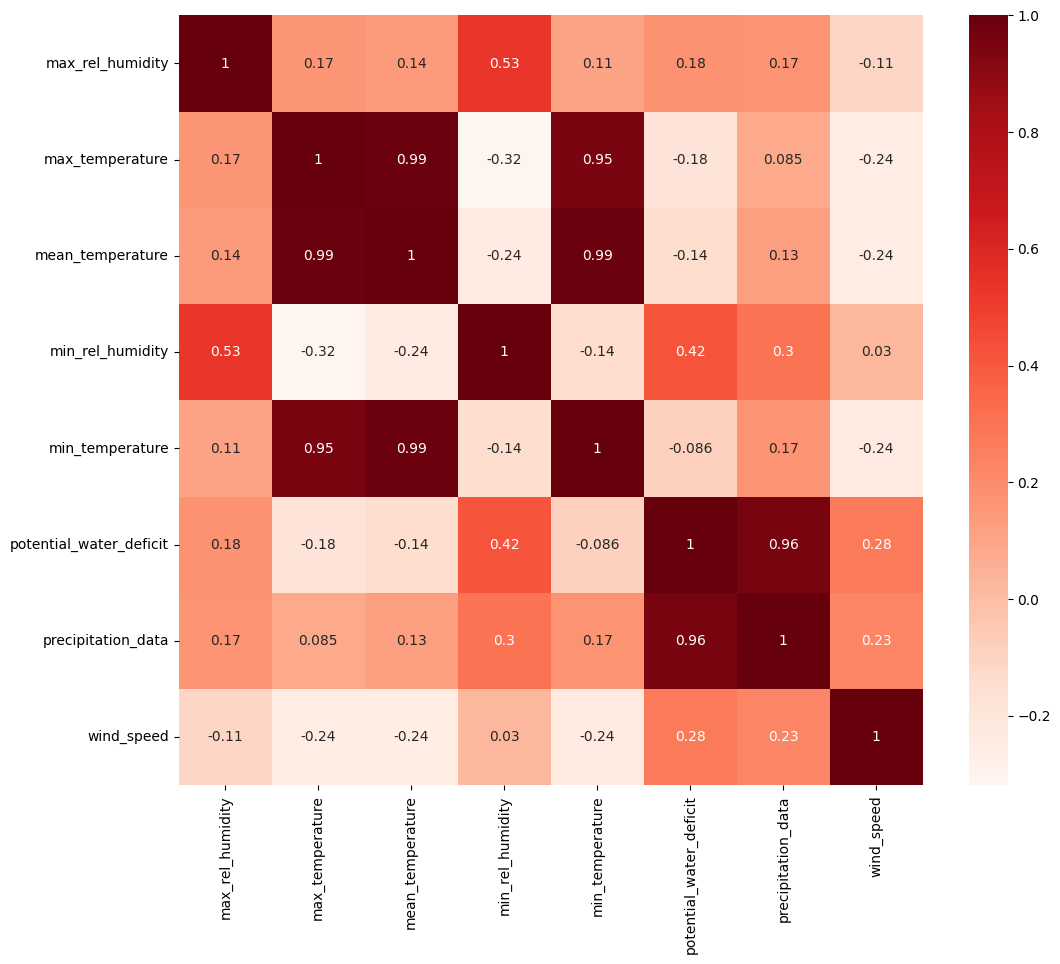

In [7]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
#Correlation with output variable
cor_target = abs(cor["wind_speed"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

wind_speed    1.0
Name: wind_speed, dtype: float64


In [9]:
sns.set(rc={'figure.figsize':(11, 4)})

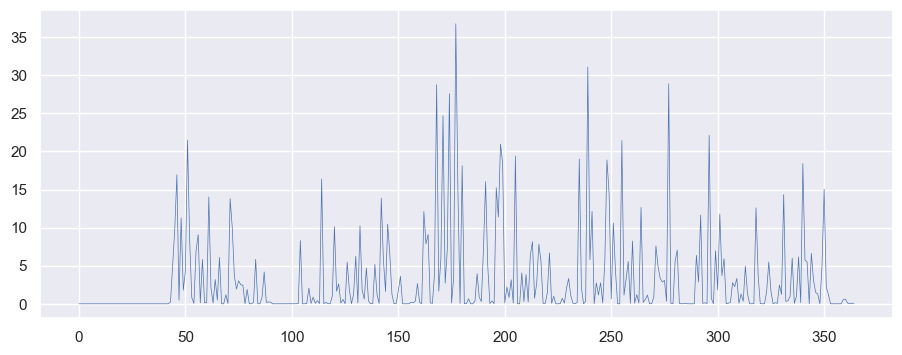

In [10]:
data['precipitation_data'].plot(linewidth=0.5);

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [12]:
y_pred = pd.Series(model.predict(X), index=X.index)

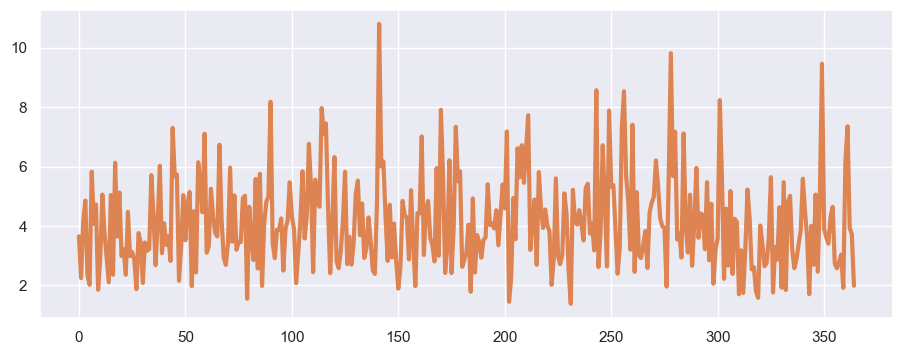

In [13]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)

In [14]:
lag_1 = data['precipitation_data'].shift(1)

In [15]:
data['lag_1']=lag_1